# Лабораторная работа №6. Многоскоростная обработка сигналов.

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

# Модуль 1. Интерполяция сигналов.

## Задача 1.1. Интерполяция сигналов с помощью ДПФ.


Пусть некоторый периодический сигнал $y(t)$ был дискретизован в соответствии с теоремой Котельникова,  $x[k]$ — один период получившейся последовательности отсчетов. Произведите интерполяцию с коэффициентом $L=5$ путем добавления нулей в середину ДПФ сигнала $x[k]$. Объясните, почему восстановление сигнала в данном случае точное.

| Вариант 	| 	&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; x(k)  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | &nbsp;  N 	|
|:-------:	|:-------------------------------------------------------:	|:--:	|
| 1 	| $ \cos{\left (\dfrac{3 \pi}{5} k \right )} + 4 \cos{\left (\dfrac{4 \pi}{5} k \right )} $ 	| 10 	|
| 2 	| $ 0.2 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $ 	| 8 	|
| 3 	| $ \cos{\left (\dfrac{\pi k}{5} \right )} + 3 \cos{\left (\dfrac{4 \pi}{5} k \right )} $ 	| 10 	|
| 4 	| $ 0.1 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $ 	| 8 	|
| 5 	| $ \cos{\left (\dfrac{2 \pi}{5} k \right )} + 6 \cos{\left (\dfrac{3 \pi}{5} k \right )} $ 	| 10 	|
| 6 	| $ 0.1 \cos{\left (\dfrac{\pi k}{5} \right )} + \cos{\left (\dfrac{4 \pi}{5} k \right )} $ 	| 10 	|

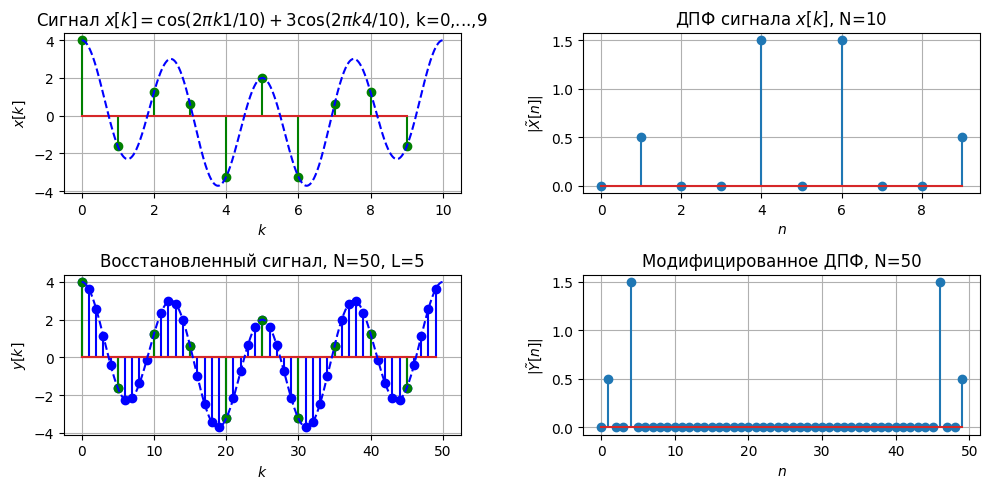

In [ ]:
N=10
x=np.ones(N)
n_0=1
n_1=4
A=3
L=5

k = np.arange(N)
x = np.cos(2*np.pi*n_0*k/N)+A*np.cos(2*np.pi*n_1*k/N)

Q=1024
k1=np.arange(Q)
q = np.cos(2*np.pi*n_0*k1/Q)+A*np.cos(2*np.pi*n_1*k1/Q)

plt.figure(figsize=[10, 5], dpi=100)
plt.subplot(2,2,1)
plt.stem(np.arange(x.size), x, 'g', 'go', use_line_collection=True)
plt.plot(N*np.arange(q.size)/Q, q, 'b--')
plt.title(u'Сигнал $x[k]=\cos(2\\pi k %i/%i)+%i\cos(2\\pi k %i/%i)$, k=0,...,%i' 
          %(n_0, N, A, n_1, N, (N-1)))
plt.xlabel(u'$k$')
plt.ylabel(u'$x[k]$')
plt.grid()

Xn=np.fft.fft(x, N)/N
plt.subplot(2,2,2)
plt.stem(np.arange(N), abs(Xn), use_line_collection=True)
plt.title(u'ДПФ сигнала $x[k]$, N=%i' %N);
plt.xlabel(u'$n$');
plt.ylabel(u'$|\\tilde{X}[n]|$');
plt.grid()

if (N%2)==0:
    Yn=np.hstack((Xn[0:(N//2)], Xn[N//2]/2, np.zeros((L-1)*N-1), 
                     Xn[N//2]/2, Xn[(N//2+1):N]))    
#if (N%2)!=0:
#    add code
    
plt.subplot(2,2,4)
plt.stem(np.arange(Yn.size), abs(Yn), use_line_collection=True)
plt.title(u'Модифицированное ДПФ, N=%i' %(Yn.size));
plt.xlabel(u'$n$');
plt.ylabel(u'$|\\tilde{Y}[n]|$');
plt.grid()

x2=np.fft.ifft(Yn)*L*N
plt.subplot(2,2,3)
plt.stem(np.arange(x2.size), x2.real,'b', 'bo', use_line_collection=True)
plt.stem(Yn.size*np.arange(x.size)/N, x, 'g', 'go', use_line_collection=True)
plt.plot(L*N*np.arange(q.size)/Q, q, 'b--')
plt.title(u'Восстановленный сигнал, N=%i, L=%i' %(Yn.size, L))
plt.xlabel(u'$k$')
plt.ylabel(u'$y[k]$')
plt.grid()
plt.tight_layout()

#plt.savefig('fft_iterpolation_1.eps', format = 'eps', bbox_inches='tight')
plt.show()

Если исходный сигнал $x(t)=\cos\left(2\pi  \dfrac{1}{10} f_\text{д}  t \right)+3\cos\left(2\pi  \dfrac{4}{10} f_\text{д} t \right)$, то востановление точное:
* Спектр сигнала $x(t)$
$$X(f) = 0,5 \delta\left(f-\dfrac{1}{10} f_\text{д}\right)+0,5 \delta\left(f+\dfrac{1}{10} f_\text{д}\right)+1,5 \delta\left(f-\dfrac{4}{10} f_\text{д}\right)+1,5 \delta\left(f+\dfrac{4}{10} f_\text{д}\right).$$
* при дискретизации с шагом $\Delta t_1 = 1/ f_\text{д}$ получаем последовательность $$x[k]=\cos\left(2\pi  \dfrac{1}{10} k \right)+3\cos\left(2\pi  \dfrac{4}{10} k  \right).$$
Ее ДВПФ
$$X(\nu) = \sum_{m=-\infty}^{\infty} 0,5 \delta\left(\nu-\dfrac{1}{10} +m\right)+0,5 \delta\left(\nu-\dfrac{1}{10} -m\right)+1,5 \delta\left(\nu-\dfrac{4}{10} +m\right)+ {1,5} \delta\left(\nu-\dfrac{4}{10} -m\right).$$
ДПФ размерности $N_\text{FFT}=10$:
$$\tilde{X}[n]=\left\{ \begin{matrix}
   0,5, \; n=\pm 1 + 10m,  \;m\in Z;  \\
   1,5, \; n=\pm 4 + 10m,  \;m\in Z;  \\
   0, \; \text{при других } \;n. 
\end{matrix} \right.
$$


* при дискретизации с шагом $\Delta t_2 = 1/ (Lf_\text{д})$ получаем последовательность $$y[k]=\cos\left(2\pi  \dfrac{1}{10 L} k \right)+3\cos\left(2\pi  \dfrac{4}{10 L} k  \right).$$
Ее ДВПФ
$$Y(\nu) = \sum_{m=-\infty}^{\infty} 0,5 \delta\left(\nu-\dfrac{1}{10L} +m\right)+0,5 \delta\left(\nu-\dfrac{1}{10L} -m\right)+1,5 \delta\left(\nu-\dfrac{4}{10L} +m\right)+{1,5} \delta\left(\nu-\dfrac{4}{10L} -m\right).$$
ДПФ размерности $N_\text{FFT}=10L$:
$$\tilde{Y}[n]=\left\{ \begin{matrix}
   0,5, \; n=\pm 1 + 30m,  \;m\in Z;  \\
   1,5, \; n=\pm 4 + 30m,  \;m\in Z;  \\
   0, \; \text{при других } \;n. 
\end{matrix} \right.
$$

## Задача 1.2. Система однократной интерполяции.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=0,125$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.upfirdn()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $L$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы интерполяции. 



In [ ]:
N = 32
nu1 = 0.125
nu2 = 2 * nu1
k = np.arange (N)
x = 3 * np.sin (2 * np.pi * nu1 * k) + 6 * np.sin (2 * np.pi * nu2 * k)
L = 8
fs = 600

1) - Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику  h[k] , АЧХ и ФЧХ.

**Ответ:** В первой лабе данного семестра было показано, что метод равномерной чебышёвской аппроксимации позволяет создать ФНЧ, удовлетворяющий заданным требованиям при наименьшем порядке фильтра (по сравнению с другими рассмотренными методами). Поэтому будем использовать метод равномерной Чебышёвской аппроксимации для построения фильтра.

Фильтр для интерполяции должен аппроксимировать ИФНЧ с частотой среза $1/2M$ и усилением в $L$ раз в полосе пропускания.

In [ ]:
f1 = fs / (2 * L)
f2 = fs / (2 * L) + 0.02 * fs
bands = np.array([0, f1, f2, fs / 2])
desired = np.array([L, 0])
weight = np.array([1, 1])
h_pm = signal.remez(numtaps=N * L, bands=bands, desired=desired, weight=weight, fs=fs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


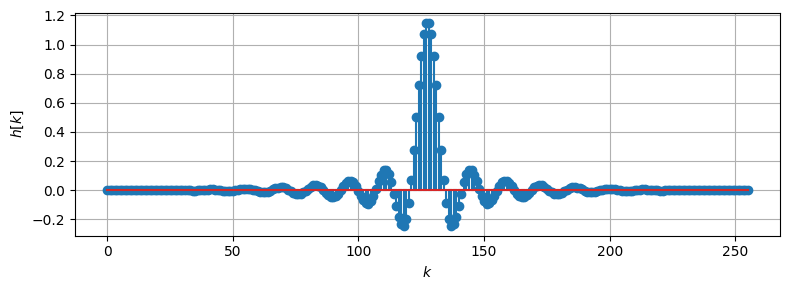

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(h_pm.size), h_pm)
plt.xlabel("$k$")
plt.ylabel('$h[k]$')
plt.tight_layout()
plt.grid()

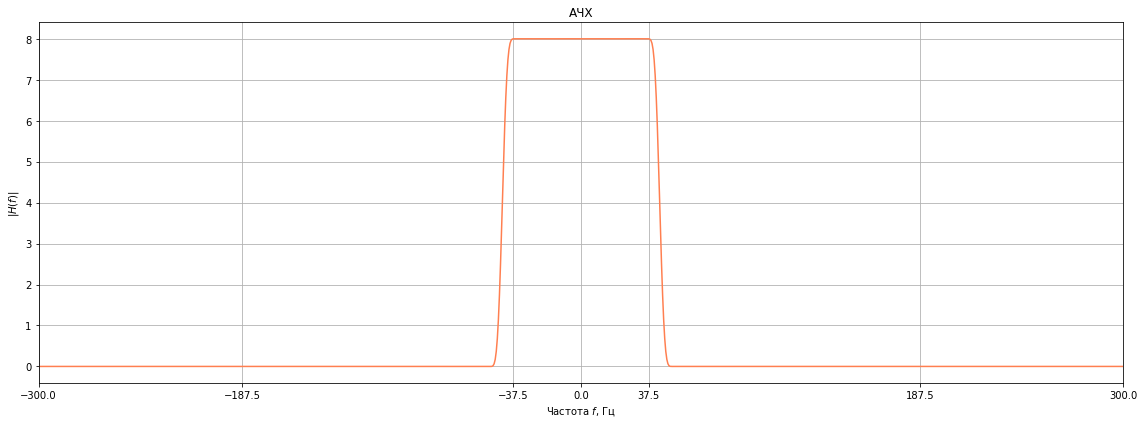

In [ ]:
M=1024
H1=np.fft.fftshift(np.fft.fft(h_pm, M))
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M) * fs /M-fs/2, abs (H1), color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -5 * fs /(2*L), -1 * fs /(2*L), 0, 1 * fs /(2*L), 5 * fs /(2*L), fs/2])
plt.tight_layout()

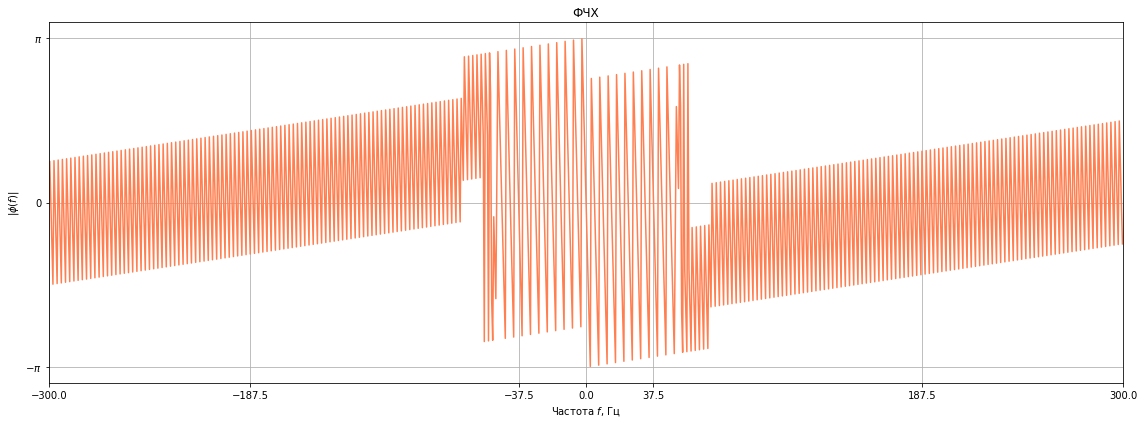

In [ ]:
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M) * fs /M-fs/2, np.angle (H1), color='coral')
plt.grid()
plt.ylabel('$|\phi(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('ФЧХ')
plt.xlim([-fs/2, fs/2])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))

plt.xticks([-fs/2, -5 * fs /(2*L), -1 * fs /(2*L), 0, 1 * fs /(2*L), 5 * fs /(2*L), fs/2])
plt.tight_layout()


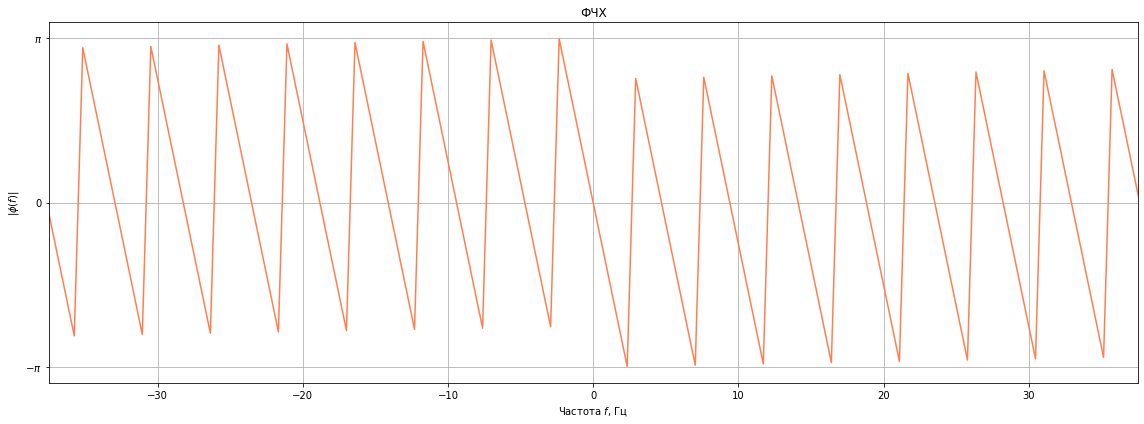

In [ ]:
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M) * fs /M-fs/2, np.angle (H1), color='coral')
plt.grid()
plt.ylabel('$|\phi(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('ФЧХ')
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
plt.xlim([-fs/(2 * L), fs/(2 * L)])
plt.tight_layout()

Как видно, ФЧХ фильтра и вправду линейна, что подтверждает то, что выбран был именно КИХ фильтр.

2) - Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


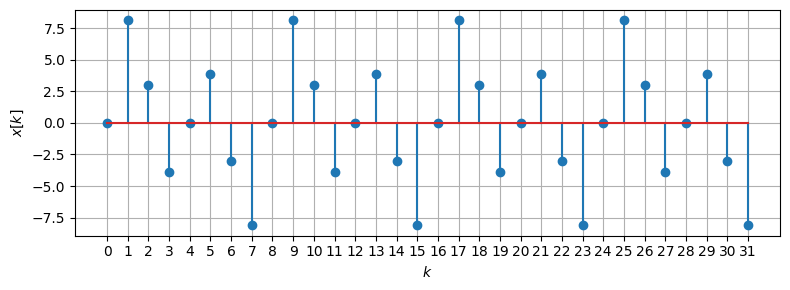

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.xticks(np.arange(x.size))
plt.tight_layout()
plt.grid()

In [ ]:
q=signal.upfirdn([1], x, up=L)   # FIR filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


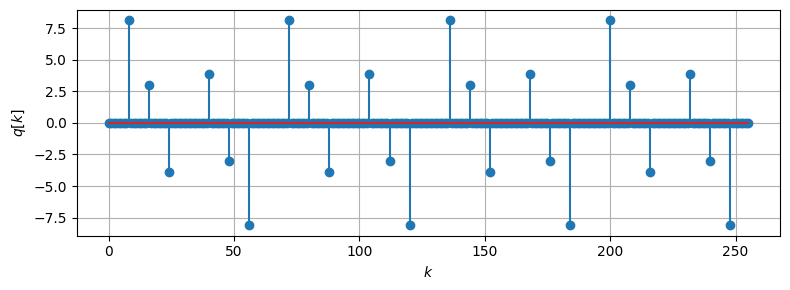

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(q.size), q)
plt.xlabel("$k$")
plt.ylabel('$q[k]$')
plt.tight_layout()
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


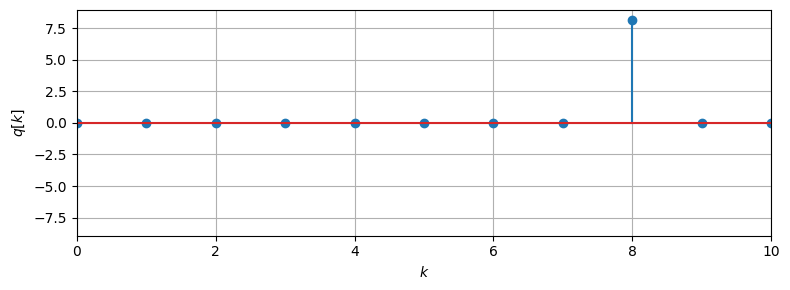

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(q.size), q)
plt.xlabel("$k$")
plt.xlim([0, 10])
plt.ylabel('$q[k]$')
plt.tight_layout()
plt.grid()

In [ ]:
y=signal.upfirdn(h_pm, x, up=L)   # FIR filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


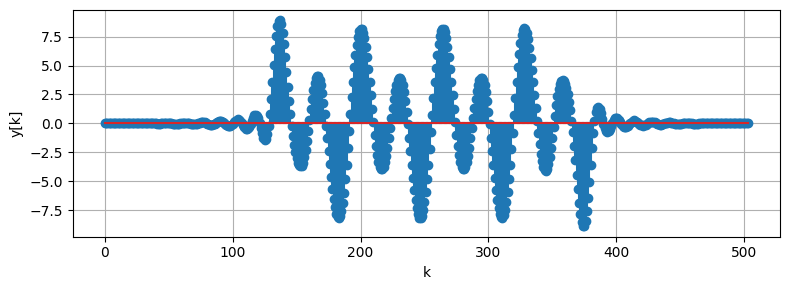

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<Figure size 800x300 with 0 Axes>

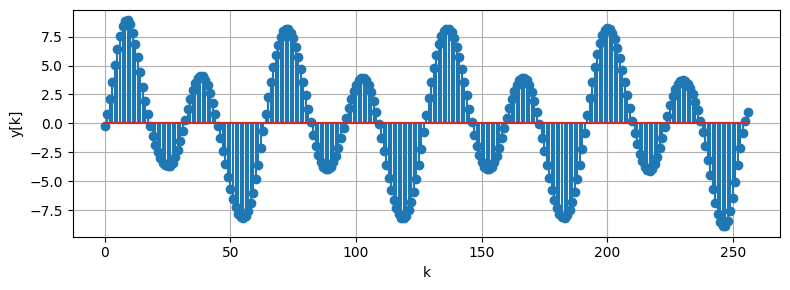

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
y=y[(N * L)//2:(2*N*L)-((N * L)//2-1)]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

3) - Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

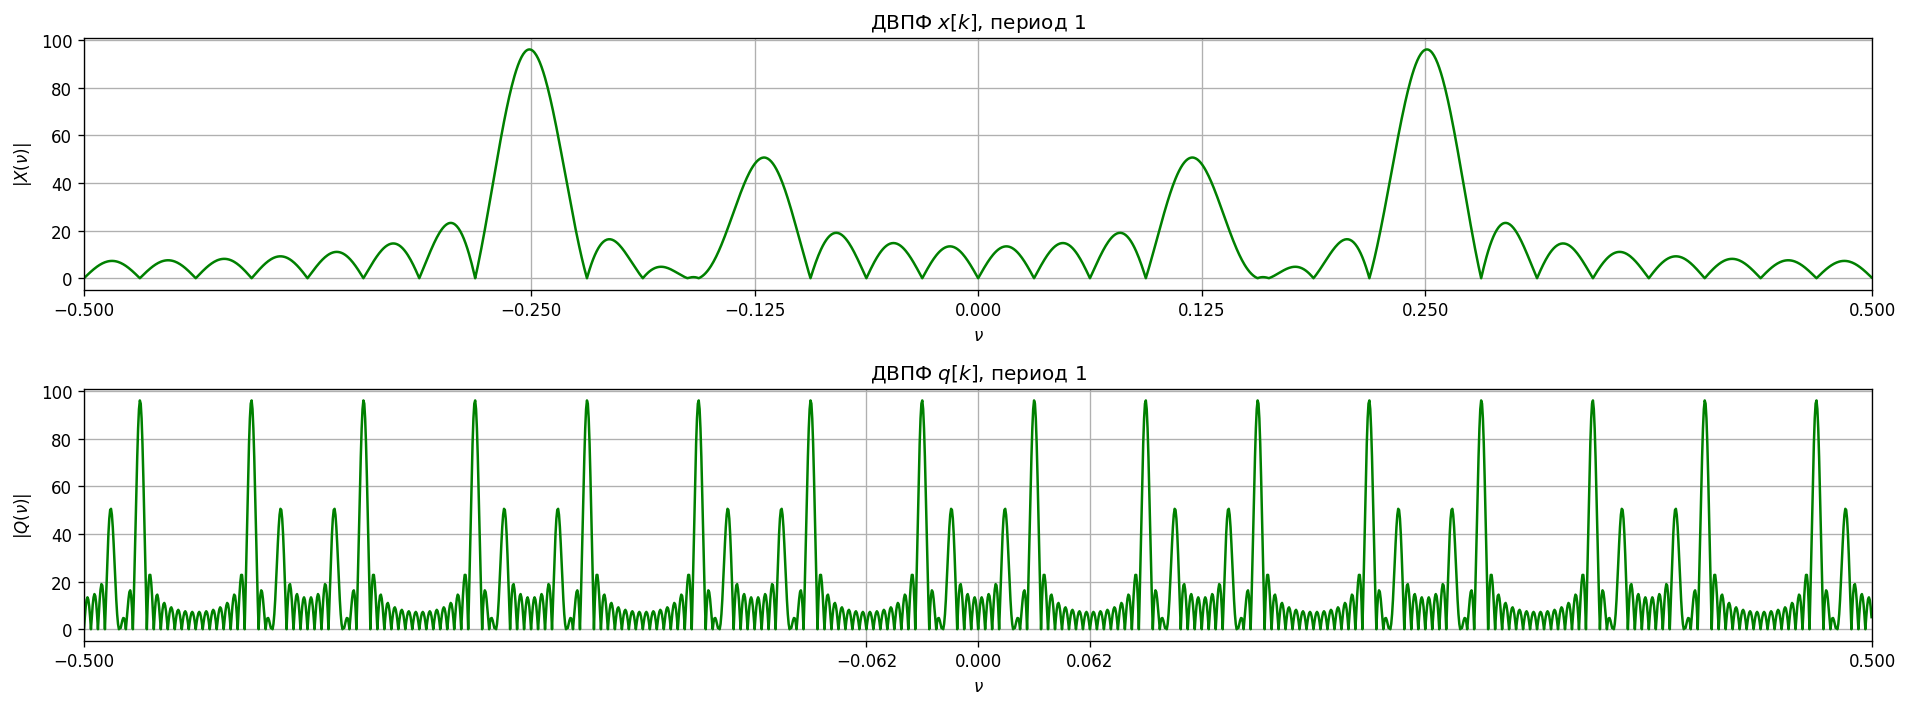

In [ ]:


nu1_array, Xn = dtft(x)
nu2_array, Q = dtft(q)
plt.figure(figsize=[16, 6], dpi=120)

plt.subplot(2, 1, 1)
plt.plot(nu1_array, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2, -nu1, 0, nu1, nu2, 0.5])
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu2_array, abs(Q), 'g')
plt.title(u'ДВПФ $q[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Q(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -0.5/L, 0, 0.5 / L, 0.5])
plt.grid()

plt.tight_layout()

<Figure size 1920x720 with 0 Axes>

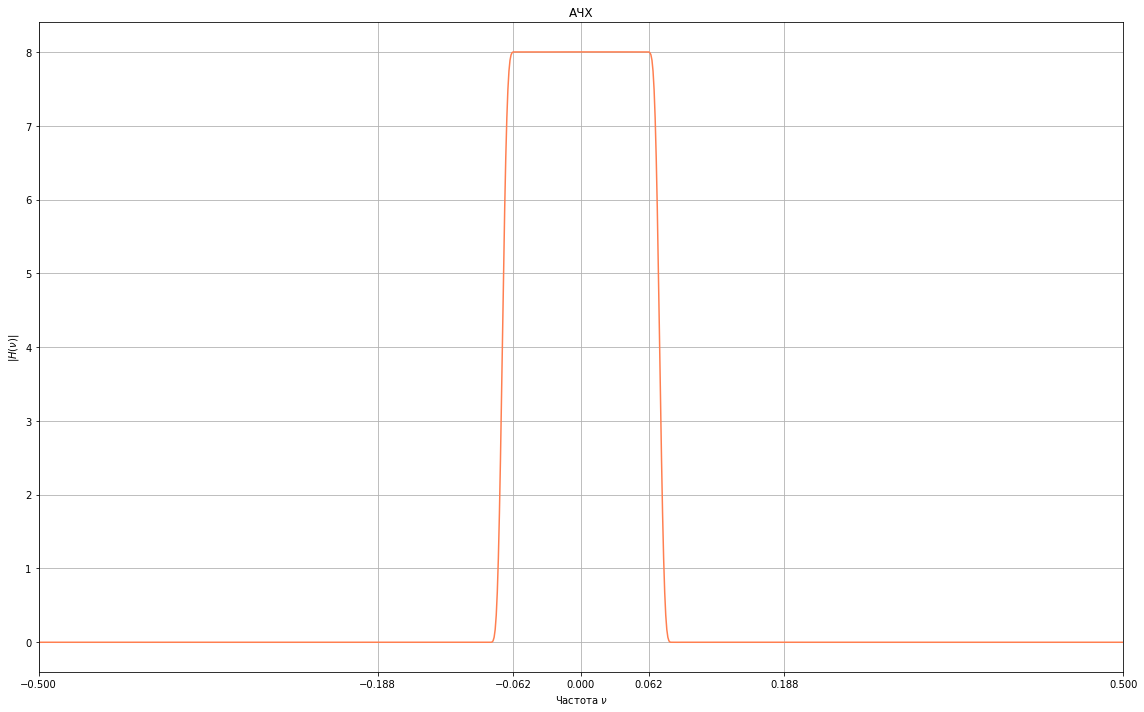

In [ ]:
M=1024
plt.figure(figsize=[16, 6], dpi=120)
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, M)))
plt.figure(figsize=[16, 10])
plt.plot(np.arange(M)/M-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-1/2, 1/2])
plt.xticks([-0.5, -3/(2*L), -1/(2*L), 0, 1/(2*L), 3/(2*L), 0.5])
plt.tight_layout()

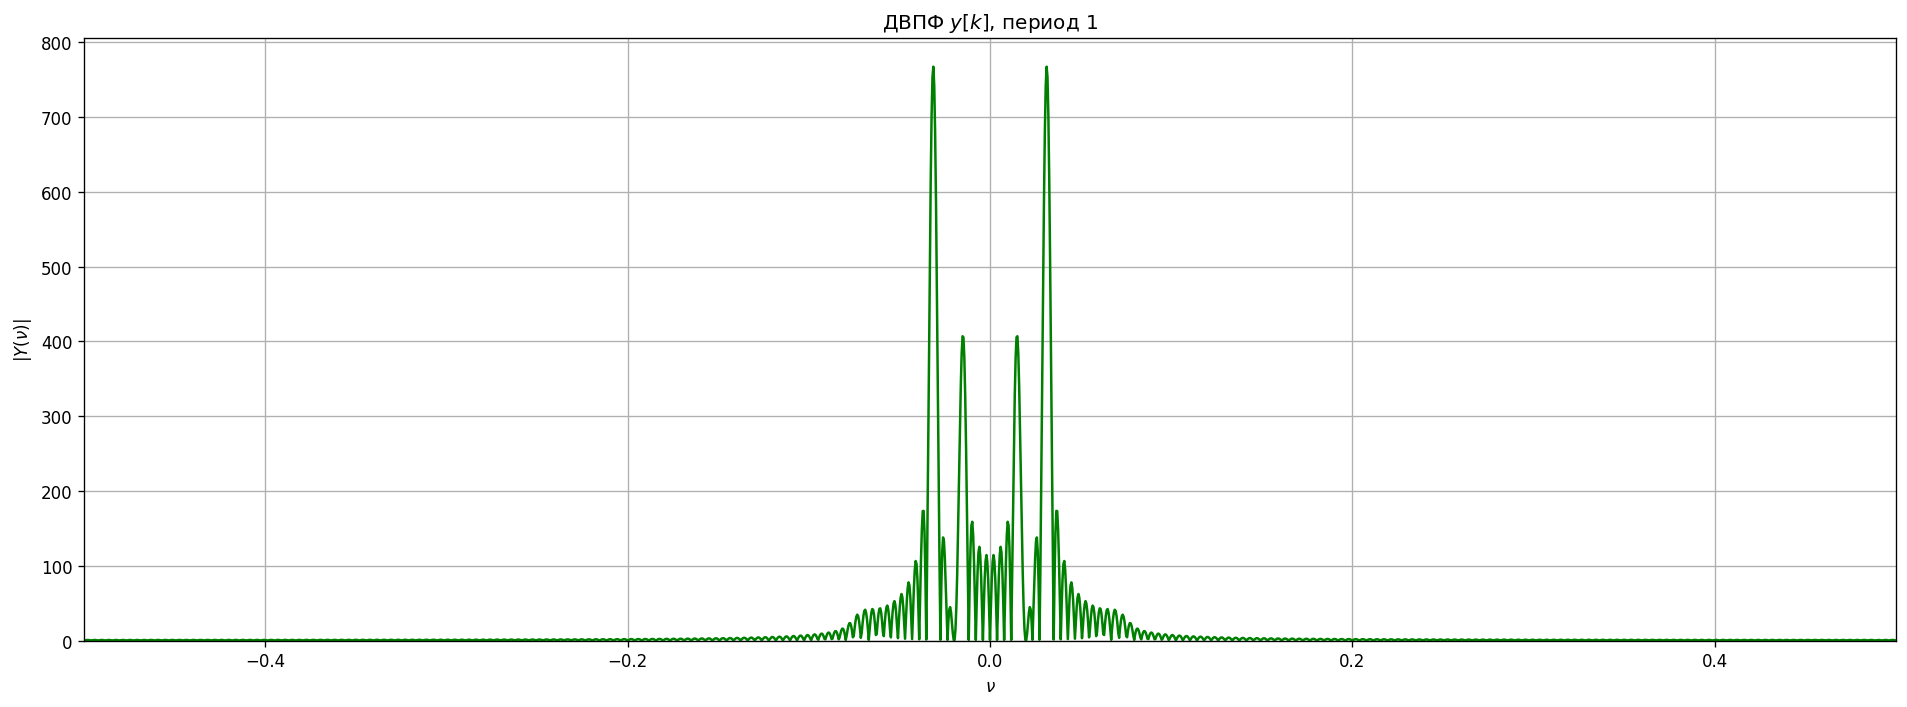

In [ ]:
nu, Yn = dtft(y)

plt.figure(figsize=[16, 6], dpi=120)
plt.plot(nu, abs(Yn),'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
# plt.xticks([-0.5, -3/(2*L), -1/(2*L), 0, 1/(2*L), 3/(2*L), 0.5])
plt.grid()
plt.tight_layout()

4) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы интерполяции. 

**Ответ:** Частота дискретизации $f_{s1} = L f_s = 4800$ Гц. Шаг дискретизации: $\Delta t_1 = 1/Lf_s \approx 0.00021$ с.

## Задача 1.3. Интерполяция первого и нулевого порядка.

Повторите вычисления задачи 1.2 для КИХ-фильтров с импульсными характеристиками ${{h}_{0}}[k]$ и ${{h}_{1}}[k]$ и $L=2$. Сравните результаты.

${{h}_{0}}[k]=\left\{ \begin{matrix}
   1,\ \ \text{ при }k=0,\ \ 1,  \\
   0,\ \ \text{ при других }k.  \\
\end{matrix} \right.$

${{h}_{1}}[k]=\left\{ \begin{matrix}
   0,5,\ \ \text{ при }k=0,\ \ 2,  \\
   1,\ \ \text{ при }k=1,  \\
   0,\ \ \text{ при других  }k.  \\
\end{matrix} \right.$



In [ ]:
N = 32
nu1 = 0.125
nu2 = 2 * nu1
k = np.arange (N)
x = 3 * np.sin (2 * np.pi * nu1 * k) + 6 * np.sin (2 * np.pi * nu2 * k)
L = 2
fs = 600

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


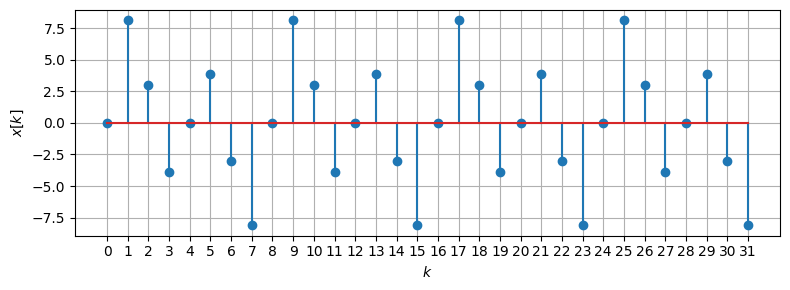

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.xticks(np.arange(x.size))
plt.tight_layout()
plt.grid()

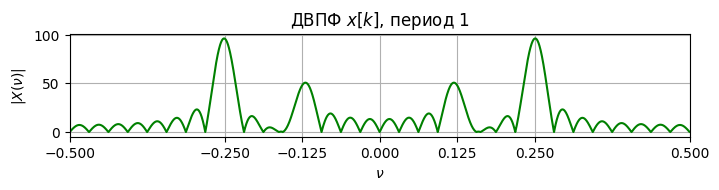

In [ ]:
nu1_array, Xn = dtft(x)
plt.figure(figsize=[8, 3], dpi=100)
plt.subplot(2, 1, 1)
plt.plot(nu1_array, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2, -nu1, 0, nu1, nu2, 0.5])
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


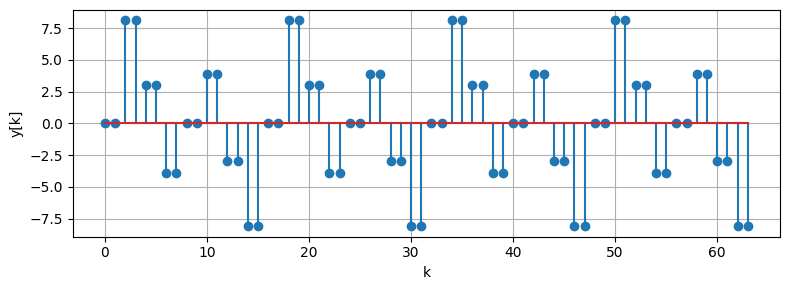

In [ ]:
y=signal.upfirdn([1, 1], x, up=2)   # FIR filter
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

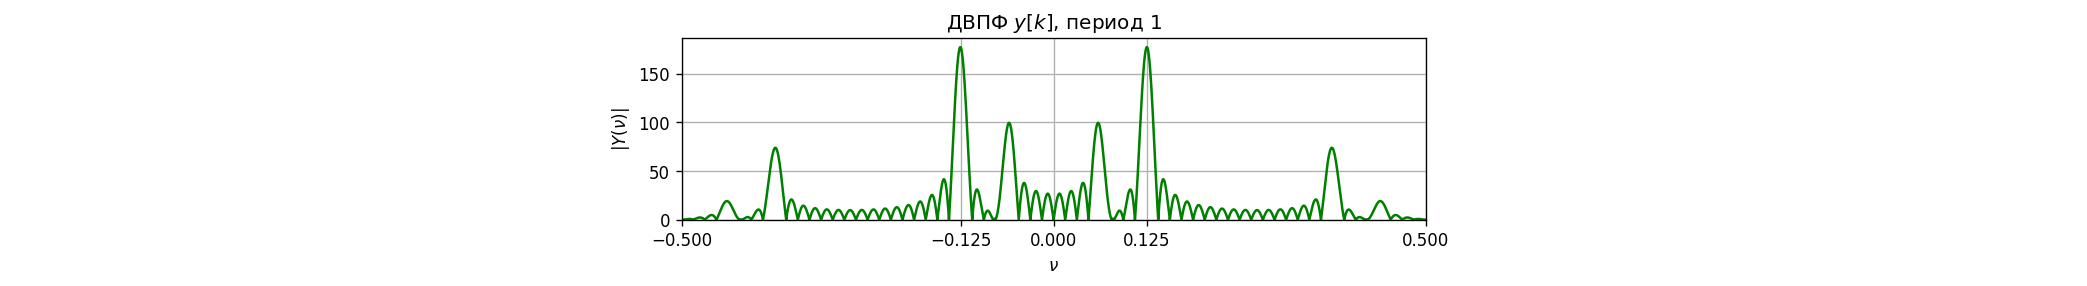

In [ ]:
nu, Yn = dtft(y)

plt.figure(figsize=[8, 2], dpi=120)
plt.plot(nu, abs (Yn), 'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.xticks([-0.5, -0.5 / (L * 2), 0, 0.5 / (L * 2), 0.5])
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


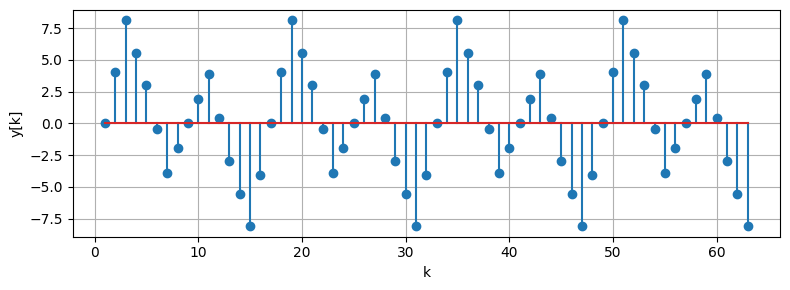

In [ ]:
y=signal.upfirdn([0.5, 1, 0.5], x, up=2)   # FIR filter
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size)[1:(y.size - 2):1], y[1:(y.size - 2):1])
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

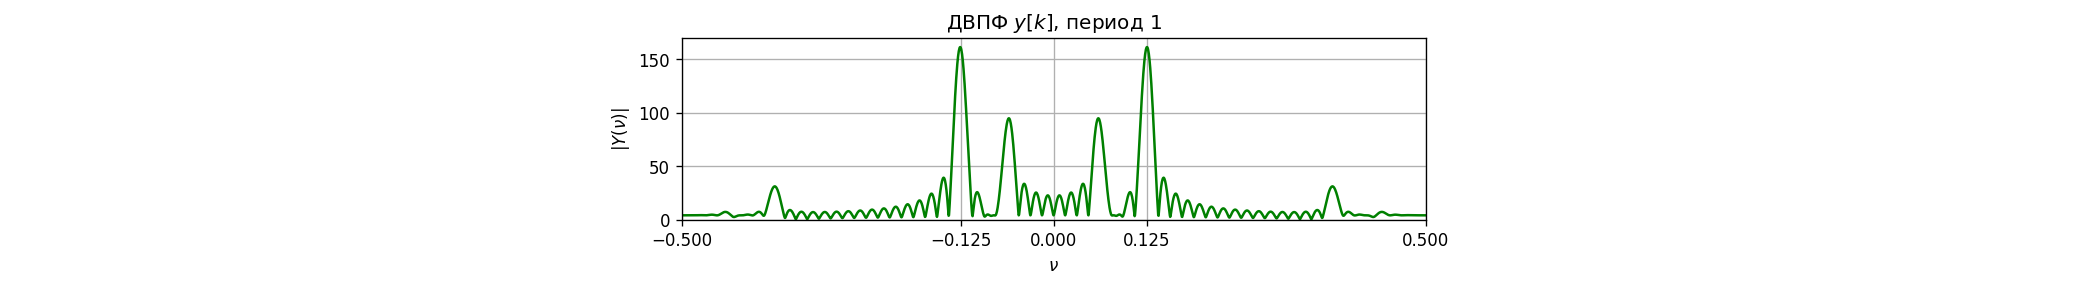

In [ ]:
nu, Yn = dtft(y[1:(y.size - 2):1])

plt.figure(figsize=[8, 2], dpi=120)
plt.plot(nu, abs (Yn), 'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.xticks([-0.5, -0.5 / (L * 2), 0, 0.5 / (L * 2), 0.5])
plt.grid()
plt.show()

#  Модуль 2. Прореживание сигналов.

## Задача 2.1. Система однократной децимации.

Промоделируйте работу системы однократной децимации с коэффицентом $M$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 127$, $\nu_1=1/64$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $M$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала системы однокраной децимации равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

In [ ]:
N = 128
nu1 = 1 / 64
nu2 = 2 * nu1
k = np.arange (N)
x = 3 * np.sin (2 * np.pi * nu1 * k) + 6 * np.sin (2 * np.pi * nu2 * k)
M = 8
fs = 600

1) - Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

**Ответ:** В первой лабе данного семестра было показано, что метод равномерной чебышёвской аппроксимации позволяет создать ФНЧ, удовлетворяющий заданным требованиям при наименьшем порядке фильтра (по сравнению с другими рассмотренными методами). Поэтому будем использовать метод равномерной Чебышёвской аппроксимации для построения фильтра. 

Фильтр для децимации должен аппроксимировать ИФНЧ с частотой среза $1/2M$.

In [ ]:
f1 = fs / (2 * M)
f2 = fs / (2 * M) + 0.02 * fs
bands = np.array([0, f1, f2, fs / 2])
desired = np.array([1, 0])
weight = np.array([1, 1])
h_pm = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


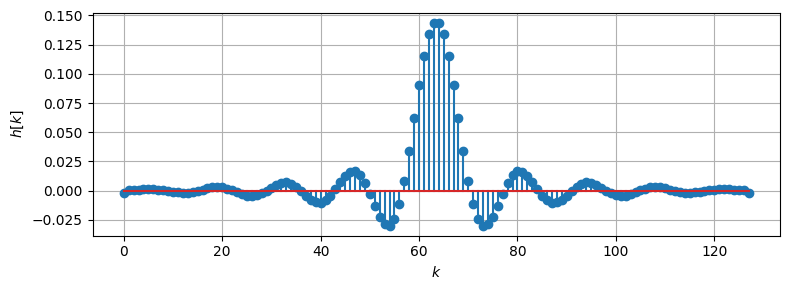

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(h_pm.size), h_pm)
plt.xlabel("$k$")
plt.ylabel('$h[k]$')
plt.tight_layout()
plt.grid()

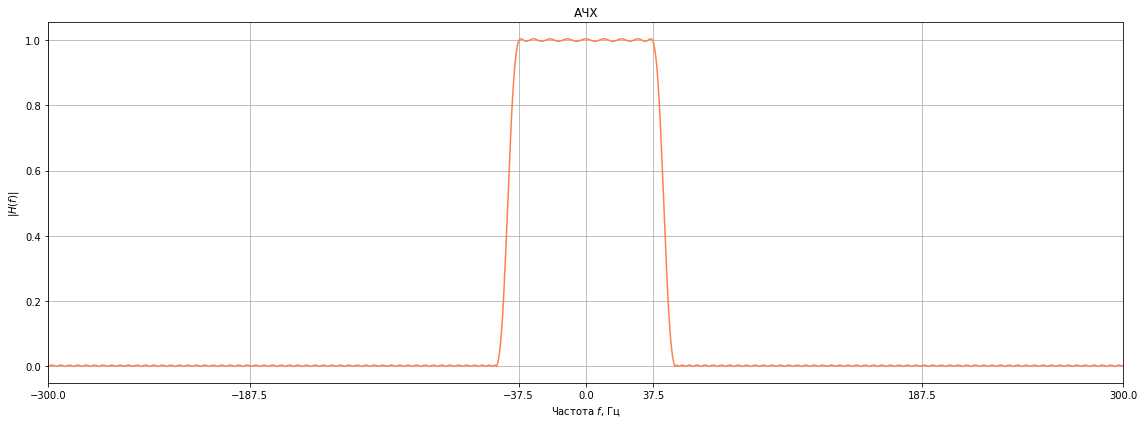

In [ ]:
M_fft=1024
H1=np.fft.fftshift(np.fft.fft(h_pm, M_fft))
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M_fft) * fs /M_fft-fs/2, abs (H1), color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -5 * fs /(2*M), -1 * fs /(2*M), 0, 1 * fs /(2*M), 5 * fs /(2*M), fs/2])
plt.tight_layout()

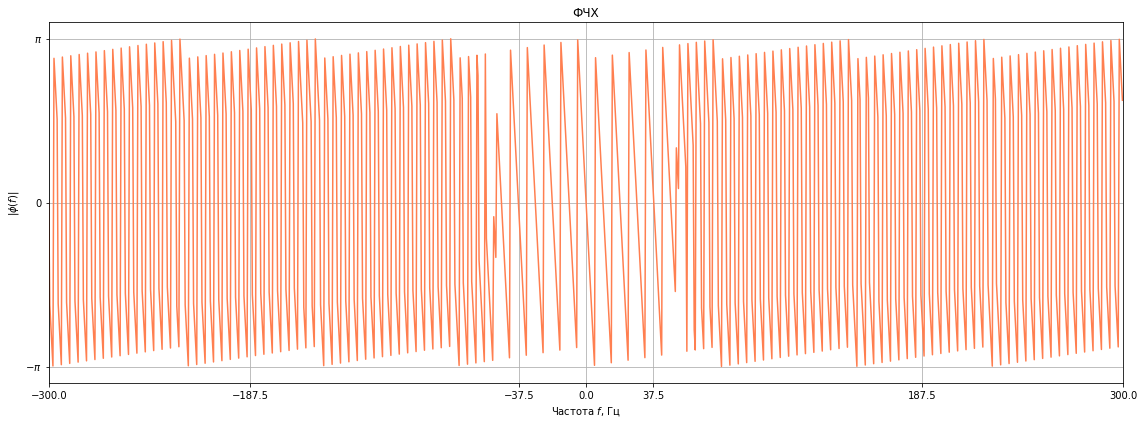

In [ ]:
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M_fft) * fs /M_fft-fs/2, np.angle (H1), color='coral')
plt.grid()
plt.ylabel('$|\phi(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('ФЧХ')
plt.xlim([-fs/2, fs/2])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))

plt.xticks([-fs/2, -5 * fs /(2*M), -1 * fs /(2*M), 0, 1 * fs /(2*M), 5 * fs /(2*M), fs/2])
plt.tight_layout()

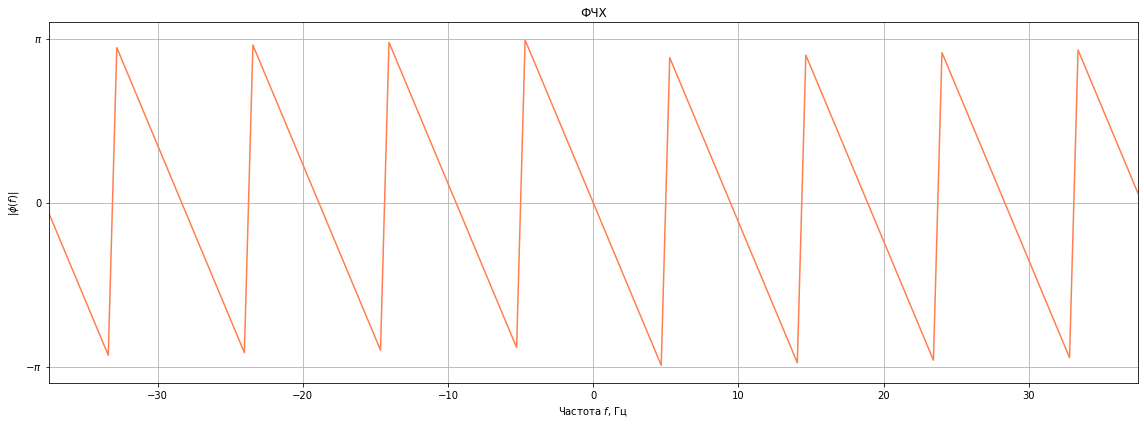

In [ ]:
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M_fft) * fs /M_fft-fs/2, np.angle (H1), color='coral')
plt.grid()
plt.ylabel('$|\phi(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('ФЧХ')
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
plt.xlim([-fs/(2 * M), fs/(2 * M)])
plt.tight_layout()


2) - Постройте графики, иллюстрирующие работу системы децимации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


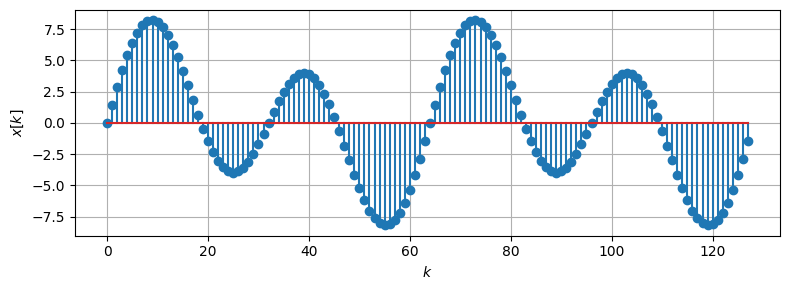

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

In [ ]:
y=signal.upfirdn(h_pm, x, down=M, up=1, axis=- 1, mode='constant', cval=0)   # FIR filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


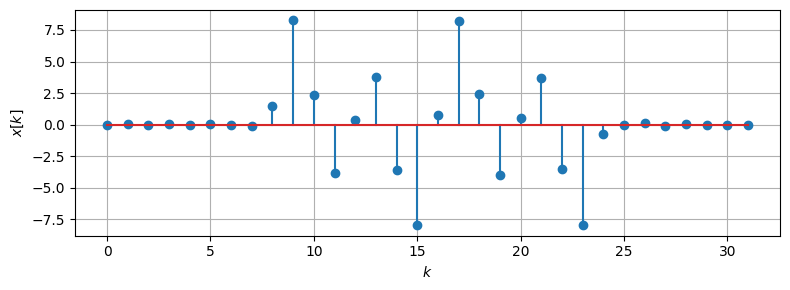

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


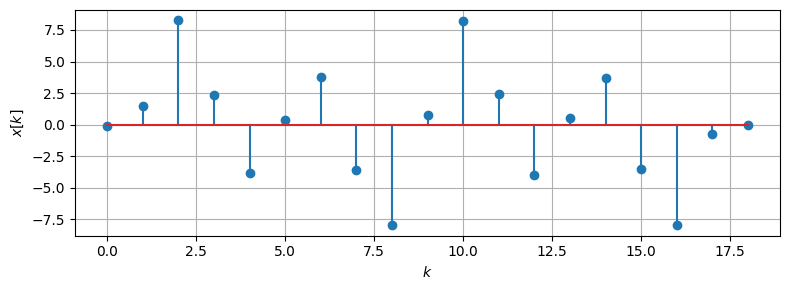

In [ ]:
y = y[7:26]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()


3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы децимации во частотной области.

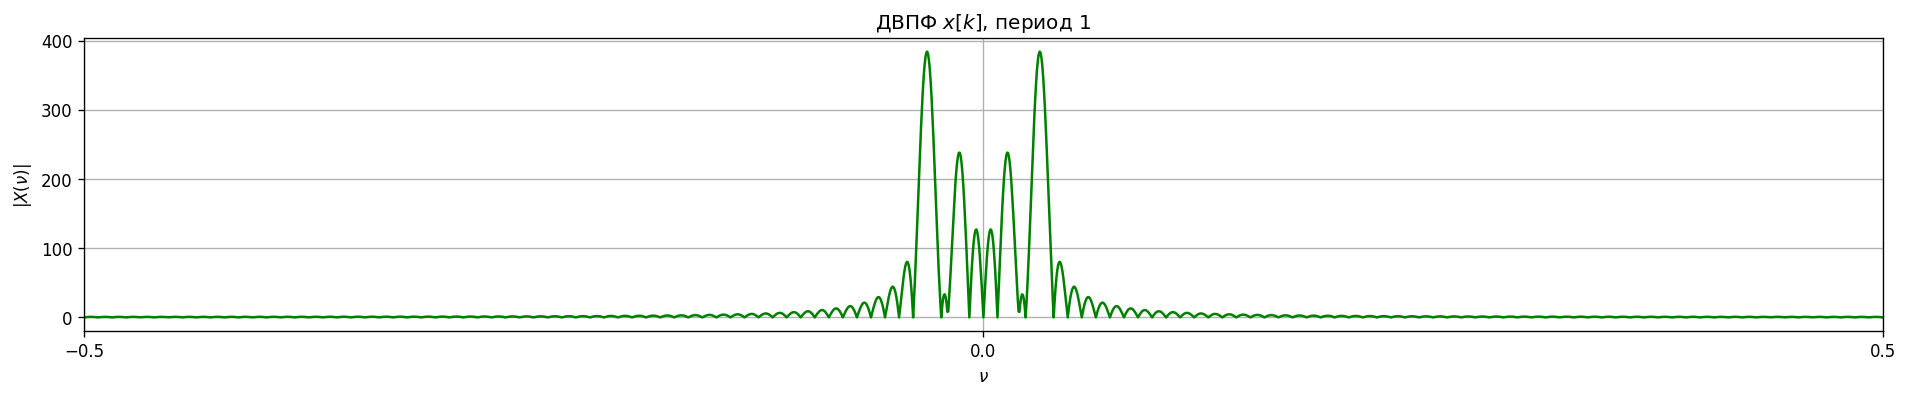

In [ ]:
nu1_array, Xn = dtft(x)
plt.figure(figsize=[16, 6], dpi=120)

plt.subplot(2, 1, 1)
plt.plot(nu1_array, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, 0, 0.5])
plt.grid()


plt.tight_layout()

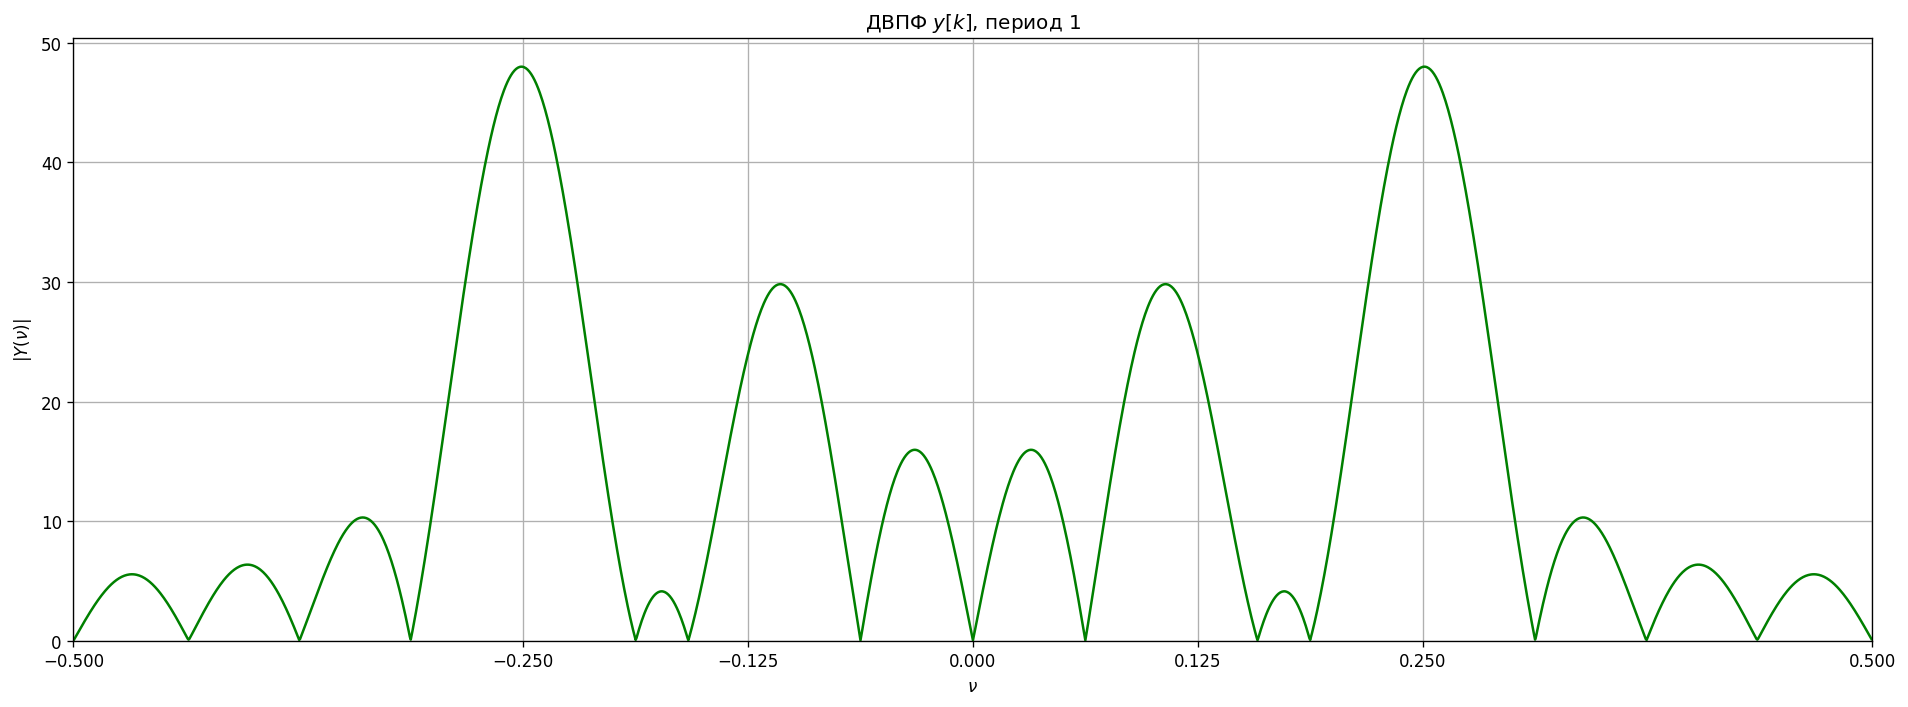

In [ ]:
nu, Yn = dtft(y)

plt.figure(figsize=[16, 6], dpi=120)
plt.plot(nu, abs(Yn),'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2 * M, -nu1 * M, 0, nu1 * M, nu2 * M, 0.5])
plt.grid()
plt.tight_layout()

4) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы децимации. 

**Ответ:** Частота дискретизации $f_{s1} = f_s / M = 75$ Гц. Шаг дискретизации: $\Delta t_1 = M/f_s \approx 0.01333$ с.

## Задача 2.2. Система однократной передискретизации с рациональным шагом.

Промоделируйте работу системы однократной передискретизации с коэффицентом $L/M=5/2$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 63$, $\nu_1=0,0625$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

4) Пусть частота дискретизации входного сигнала системы равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

In [ ]:
N = 64
nu1 = 0.0625
nu2 = 2 * nu1
k = np.arange (N)
x = 3 * np.sin (2 * np.pi * nu1 * k) + 6 * np.sin (2 * np.pi * nu2 * k)
L = 5
M = 2
fs = 600

1) - Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

**Ответ:** В первой лабе данного семестра было показано, что метод равномерной чебышёвской аппроксимации позволяет создать ФНЧ, удовлетворяющий заданным требованиям при наименьшем порядке фильтра (по сравнению с другими рассмотренными методами). Поэтому будем использовать метод равномерной Чебышёвской аппроксимации для построения фильтра. 

Фильтр для децимации должен аппроксимировать ИФНЧ с частотой среза $min (1/2M, 1/2L)$ и усилением в $L$ раз в полосе пропускания.

In [ ]:
P = max (L, M)

f1 = fs / (2 * P)
f2 = fs / (2 * P) + 0.02 * fs
bands = np.array([0, f1, f2, fs / 2])
desired = np.array([L, 0])
weight = np.array([1, 1])
h_pm = signal.remez(numtaps=N * P, bands=bands, desired=desired, weight=weight, fs=fs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


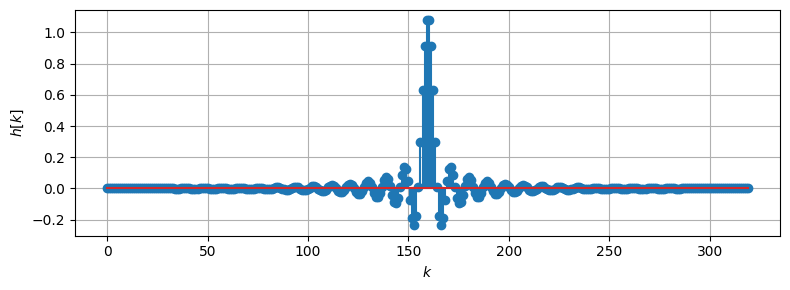

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(h_pm.size), h_pm)
plt.xlabel("$k$")
plt.ylabel('$h[k]$')
plt.tight_layout()
plt.grid()

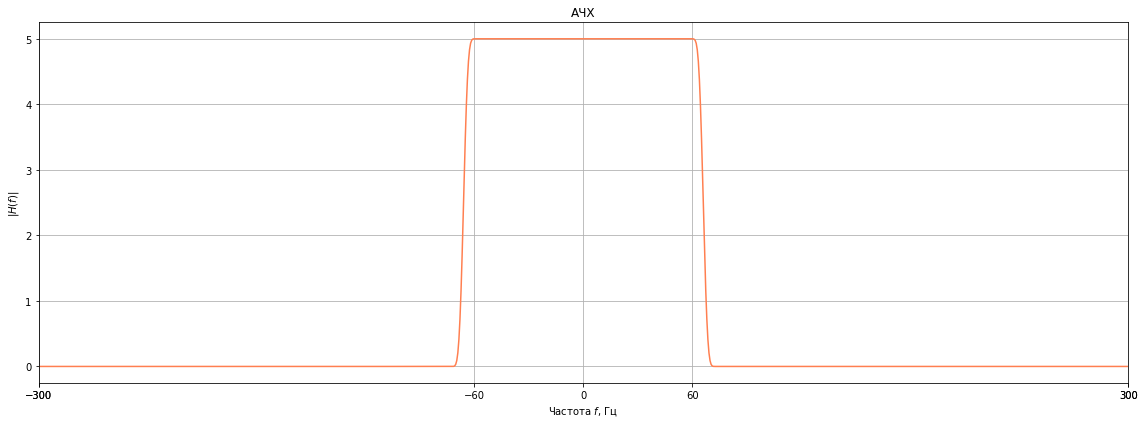

In [ ]:
M_fft=1024
H1=np.fft.fftshift(np.fft.fft(h_pm, M_fft))
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M_fft) * fs /M_fft-fs/2, abs (H1), color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -5 * fs /(2*P), -1 * fs /(2*P), 0, 1 * fs /(2*P), 5 * fs /(2*P), fs/2])
plt.tight_layout()

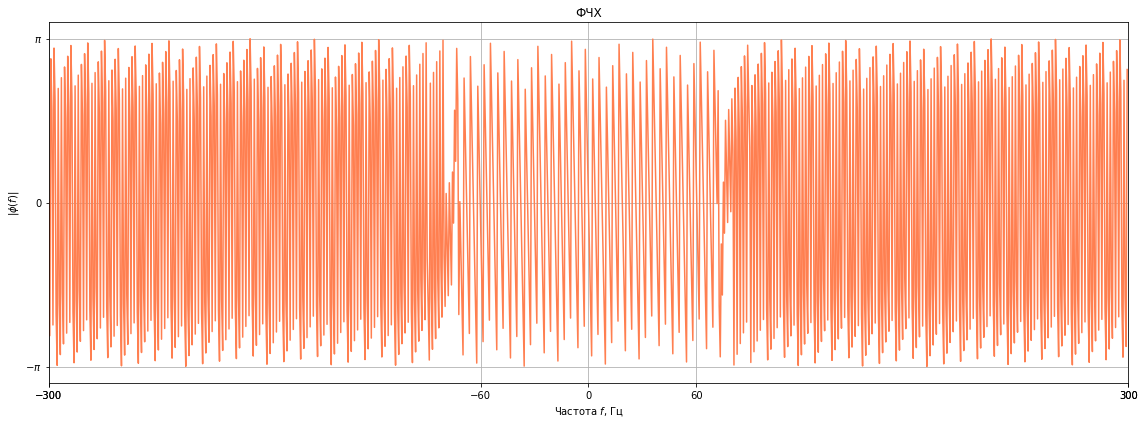

In [ ]:
plt.figure(figsize=[16, 6])
plt.plot(np.arange(M_fft) * fs /M_fft-fs/2, np.angle (H1), color='coral')
plt.grid()
plt.ylabel('$|\phi(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('ФЧХ')
plt.xlim([-fs/2, fs/2])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))

plt.xticks([-fs/2, -5 * fs /(2*P), -1 * fs /(2*P), 0, 1 * fs /(2*P), 5 * fs /(2*P), fs/2])
plt.tight_layout()

2) Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


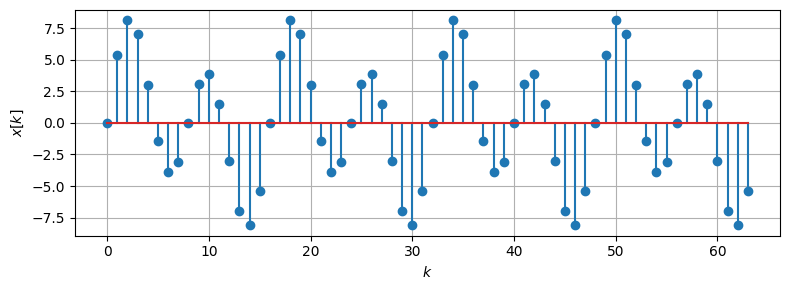

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

In [ ]:
y=signal.upfirdn(h_pm, x, down=M, up=L, axis=- 1, mode='constant', cval=0)   # FIR filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


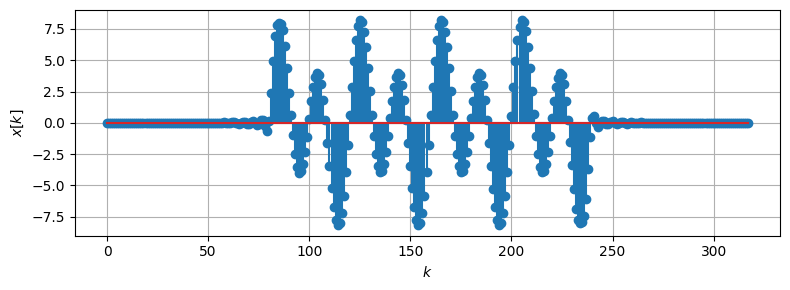

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


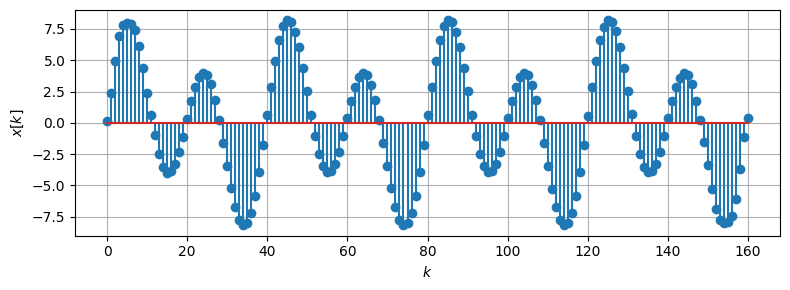

In [ ]:
k1 = N * L // (2 * M)
y = y[k1:3 * k1 + 1]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

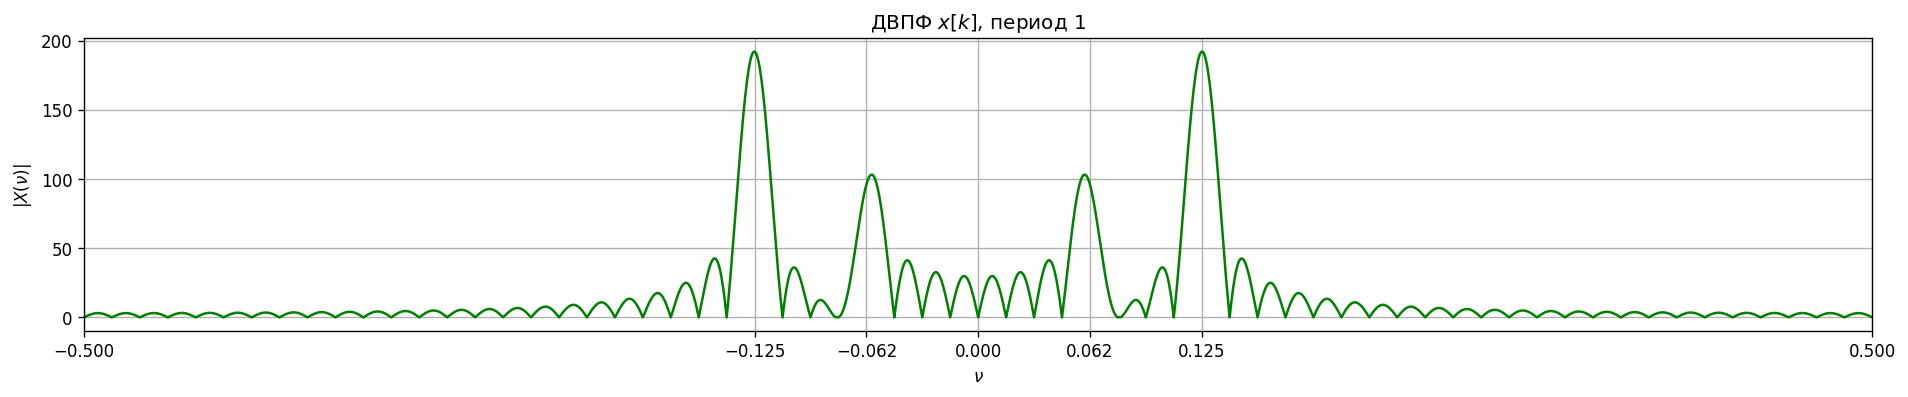

In [ ]:
nu1_array, Xn = dtft(x)
plt.figure(figsize=[16, 6], dpi=120)

plt.subplot(2, 1, 1)
plt.plot(nu1_array, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2, -nu1, 0, nu1, nu2, 0.5])
plt.grid()


plt.tight_layout()

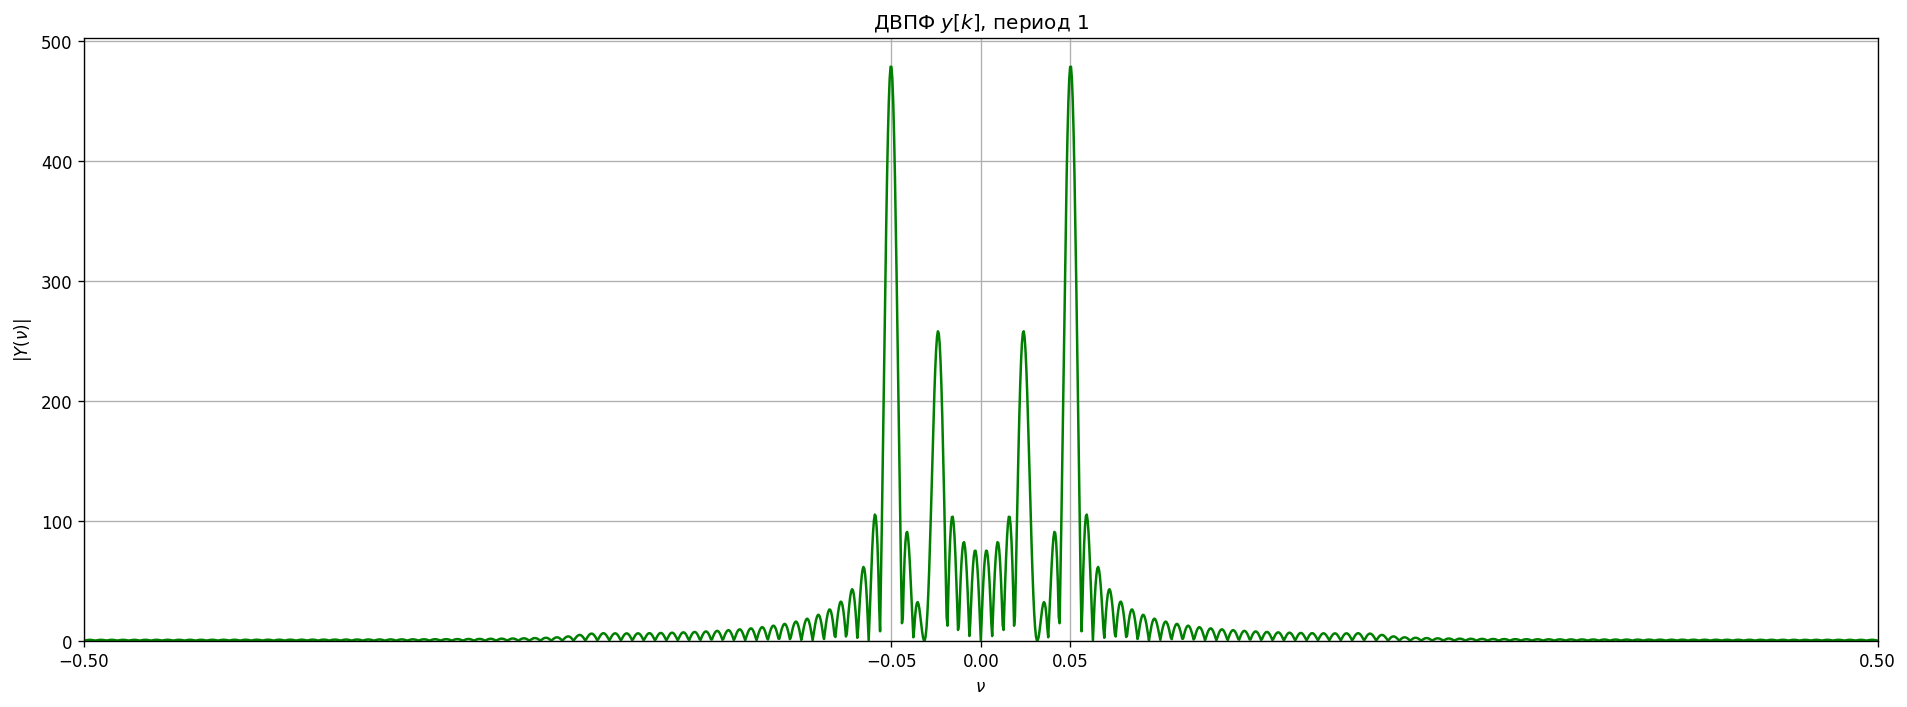

In [ ]:
nu, Yn = dtft(y)

plt.figure(figsize=[16, 6], dpi=120)
plt.plot(nu, abs(Yn),'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2 * M / L, 0, nu2 * M / L, 0.5])
plt.grid()
plt.tight_layout()

4) - Пусть частота дискретизации входного сигнала системы равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

**Ответ:** Частота дискретизации $f_{s1} = f_s L / M = 1500$ Гц. Шаг дискретизации: $\Delta t_1 = M/Lf_s \approx 0.00067$ с.

#  Модуль 3. Особенности реализации многоскоростных систем.

## Задача 3.1. Полифазные структуры многоскоростных систем.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L=4$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=5/32$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.resample_poly()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

2) Изобразите схему данной полифазной структуры однократной интерполяции. 

3) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 


In [ ]:
N = 32
nu1 = 5 / 32
nu2 = 2 * nu1
k = np.arange (N)
x = 3 * np.sin (2 * np.pi * nu1 * k) + 6 * np.sin (2 * np.pi * nu2 * k)
fs = 600
L = 4

In [ ]:
limit1=1/(2*L) - 0.02
limit2=1/(2*L) + 0.02
bands = np.array([0, limit1, limit2, 0.5])
desired = np.array([L, 0])
weight = np.array([1, 1])
h_pm = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


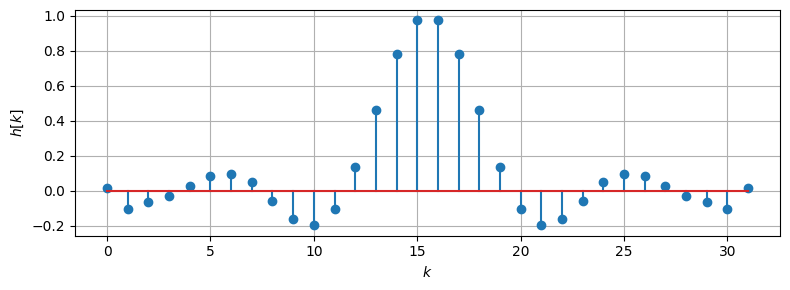

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(h_pm.size), h_pm)
plt.xlabel("$k$")
plt.ylabel('$h[k]$')
plt.tight_layout()
plt.grid()

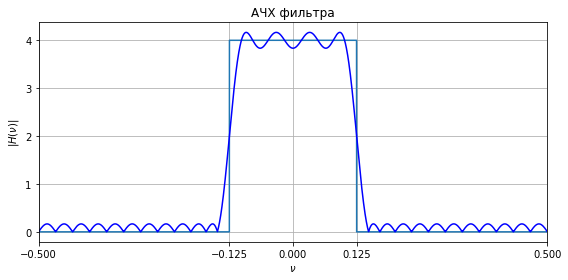

In [ ]:
H=np.fft.fftshift(np.fft.fft(h_pm, 2048))
nu=np.arange(H.size)/H.size-0.5
plt.figure(figsize=[8, 4])
dl=1e-4
plt.plot([-0.5, -1/(2*L)-dl, -1/(2*L)+dl, 1/(2*L)-dl, 1/(2*L)+dl, 0.5], [0, 0, L, L, 0, 0], 'C0')
plt.plot(nu, abs(H), 'b')
plt.xticks([-0.5, -1/(2*L), 0, 1/(2*L), 0.5])
plt.xlim([-0.5, 0.5])
plt.xlabel("$\\nu$")
plt.ylabel("|$H(\\nu)|$")
plt.title("АЧХ фильтра")
plt.grid()
plt.tight_layout()

1) Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


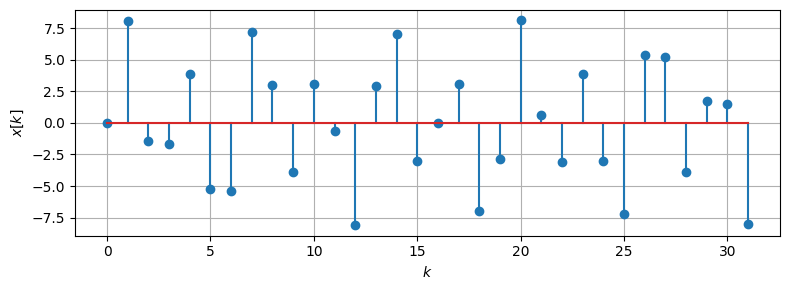

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.tight_layout()
plt.grid()

In [ ]:
y = signal.resample_poly(x, up=L, down=1, window=h_pm/L)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


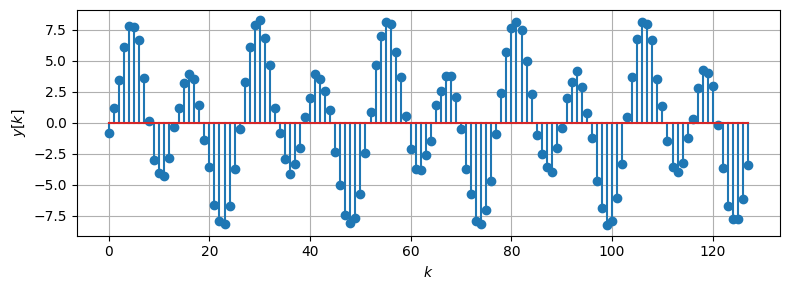

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("$k$")
plt.ylabel('$y[k]$')
plt.tight_layout()
plt.grid()

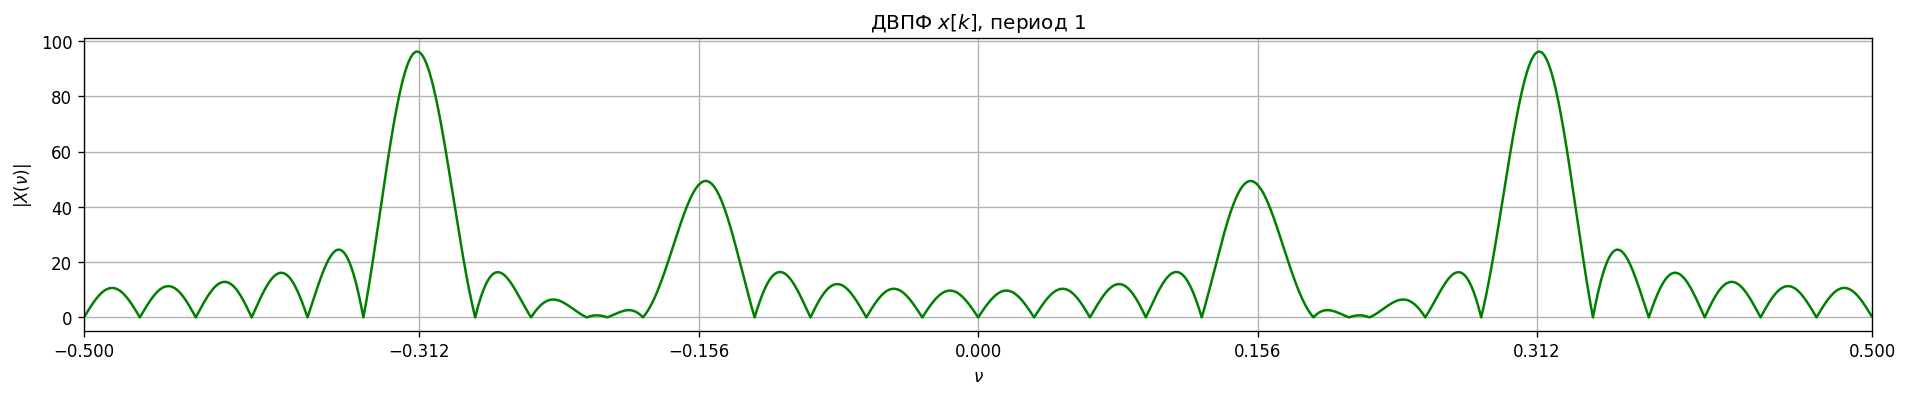

In [ ]:
nu1_array, Xn = dtft(x)
plt.figure(figsize=[16, 6], dpi=120)

plt.subplot(2, 1, 1)
plt.plot(nu1_array, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2, -nu1, 0, nu1, nu2, 0.5])
plt.grid()


plt.tight_layout()

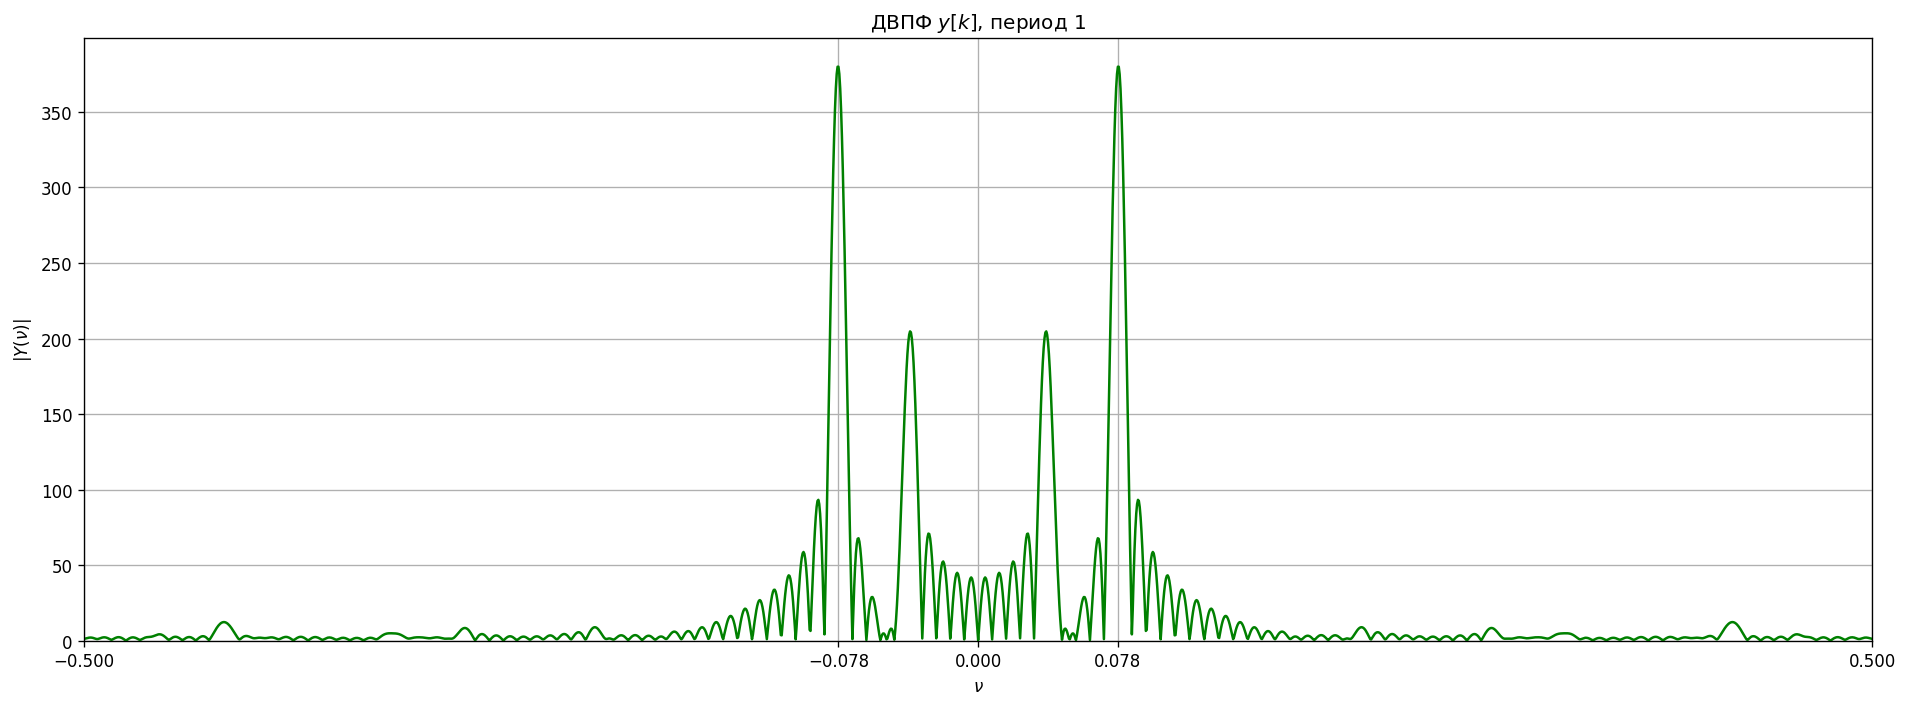

In [ ]:
nu, Yn = dtft(y)

plt.figure(figsize=[16, 6], dpi=120)
plt.plot(nu, abs(Yn),'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu2 / L, 0, nu2 / L, 0.5])
plt.grid()
plt.tight_layout()

2) - Изобразите схему данной полифазной структуры однократной интерполяции. 

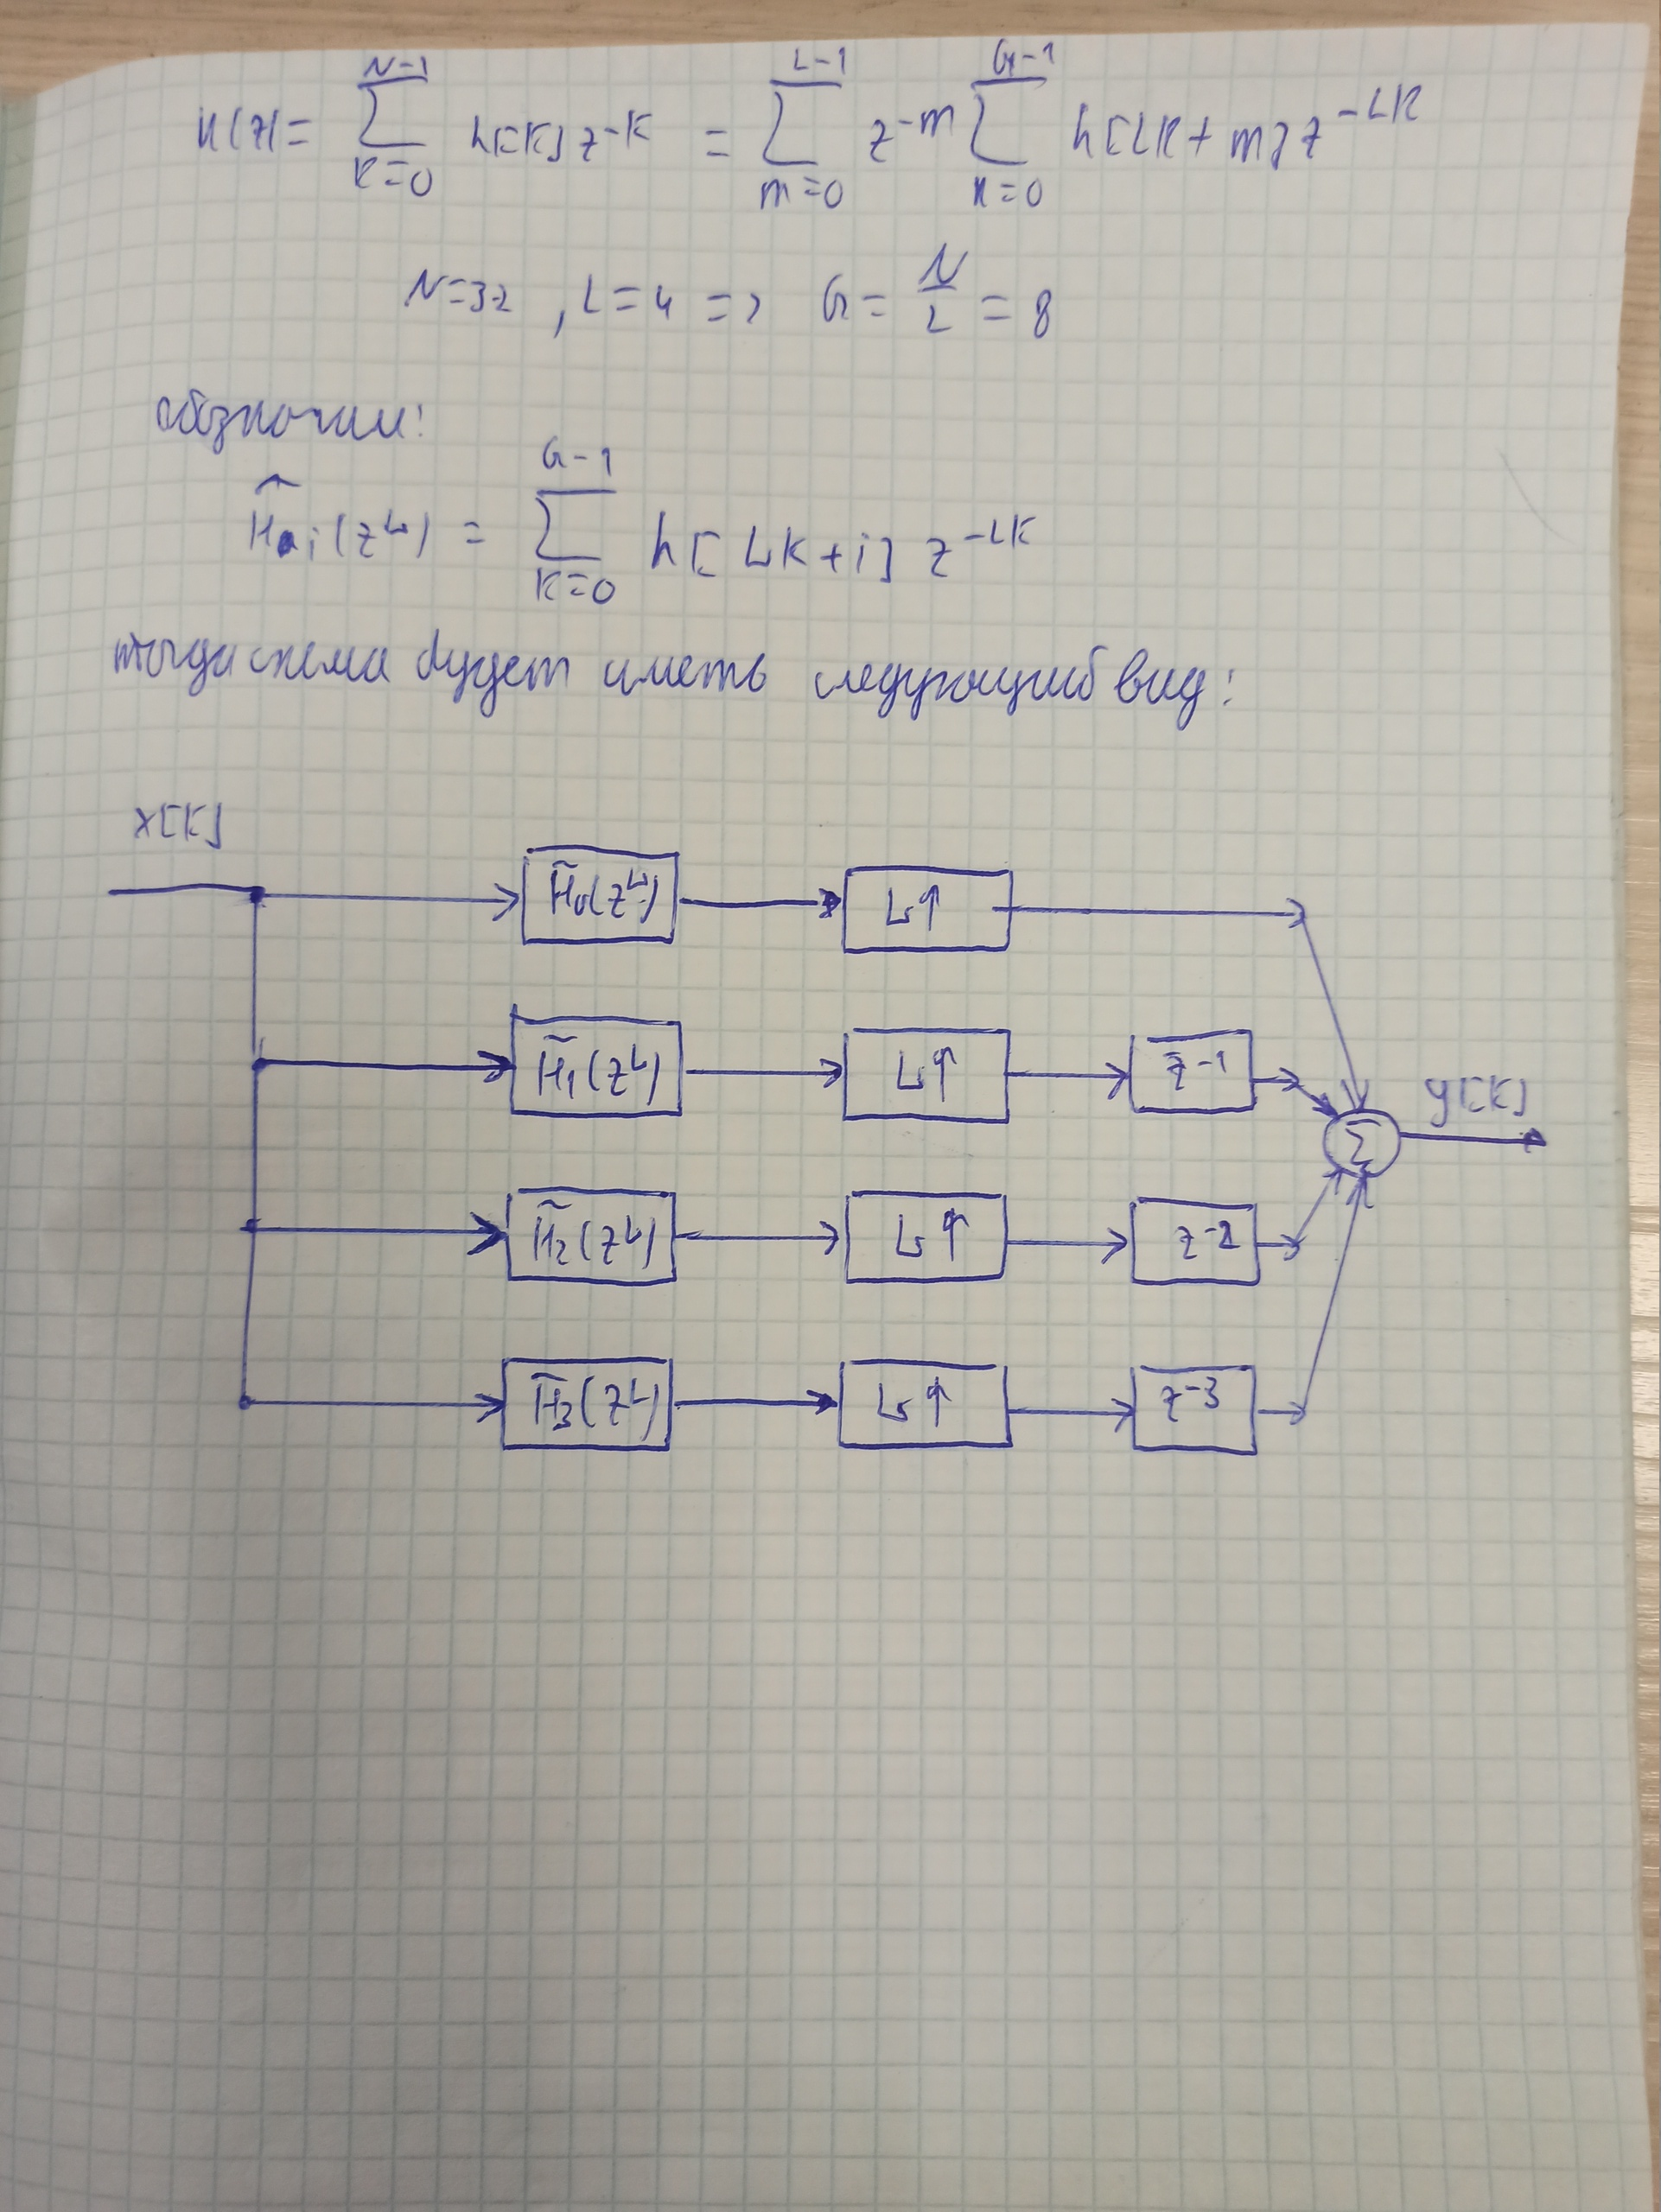

3) - Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

**Ответ:** Частота дискретизации $f_{s1} = L f_s = 2400$ Гц. Шаг дискретизации: $\Delta t_1 = 1/Lf_s \approx 0.00043$ с.

## Задача 3.2. CIC-фильтры.

Постройте импульсную характеристику и АЧХ (в дБ) CIC-фильтра, состоящего из $Q$ последовательно соединенных каскадов, в каждом из которых длина импульсной характеристики равна $N$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $N$ |16 | 16 | 16 | 12 | 12 | 12 |
| $Q$ | 3 | 4 | 5 | 3 | 4 | 5 |

Определите максимальный уровень пульсаций фильтра в полосе пропускания (по максимальному уровню бокового лепестка относительно главного). 





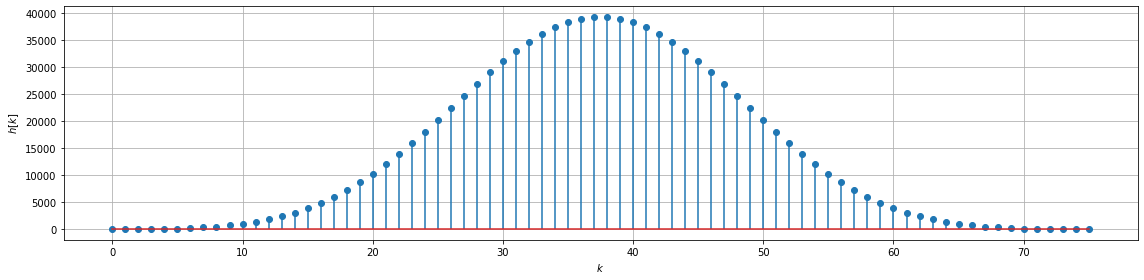

In [ ]:
Q = 5
N = 16
h1 = np.array ([1] * N)
h = signal.convolve(h1, h1) 
for ind in range (Q - 2):
    h = signal.convolve(h, h1)
plt.figure(figsize=[16, 4])
plt.stem(np.arange(h.size), h, use_line_collection=True)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.grid()
plt.tight_layout() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


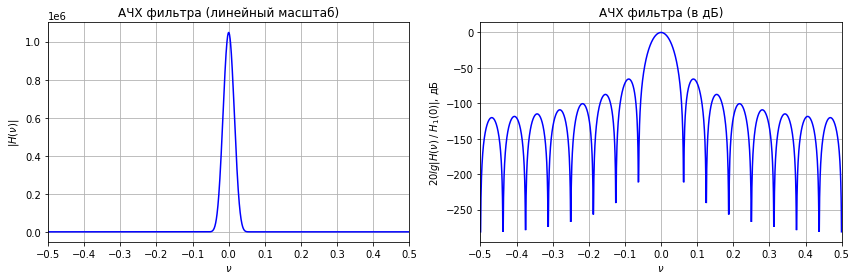

In [ ]:
H2=np.fft.fftshift(np.fft.fft(h, 2048))
nu=np.arange(H2.size)/H2.size-0.5
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(nu, abs(H2), 'b')
plt.xlim([-0.5, 0.5])
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel("$\\nu$")
plt.ylabel("|$H(\\nu)|$")
plt.title("АЧХ фильтра (линейный масштаб)")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(nu, 20*np.log10(abs(H2)/max((abs(H2)))), 'b')
plt.xlim([-0.5, 0.5])
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel("$\\nu$")
plt.ylabel("$20 lg|H(\\nu)\;/\;H_1(0)|$, дБ")
plt.title("АЧХ фильтра (в дБ)")
plt.grid()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


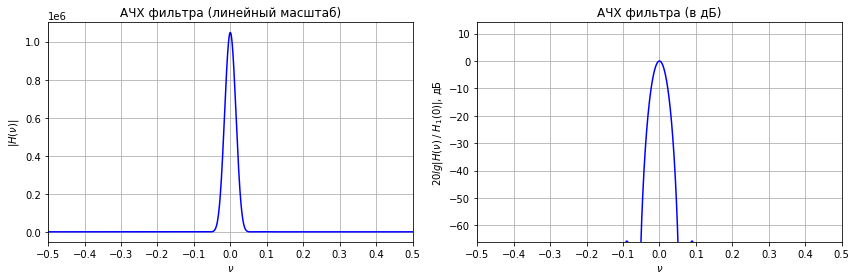

In [ ]:
H2=np.fft.fftshift(np.fft.fft(h, 2048))
nu=np.arange(H2.size)/H2.size-0.5
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(nu, abs(H2), 'b')
plt.xlim([-0.5, 0.5])
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel("$\\nu$")
plt.ylabel("|$H(\\nu)|$")
plt.title("АЧХ фильтра (линейный масштаб)")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(nu, 20*np.log10(abs(H2)/max((abs(H2)))), 'b')
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=-66)
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel("$\\nu$")
plt.ylabel("$20 lg|H(\\nu)\;/\;H_1(0)|$, дБ")
plt.title("АЧХ фильтра (в дБ)")
plt.grid()
plt.tight_layout()

Уровень бокового лепестка: -66 dB.